In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
import sklearn
sklearn.__version__

'0.23.1'

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
df[['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']] = df[['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']].replace(0, np.NaN)

df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


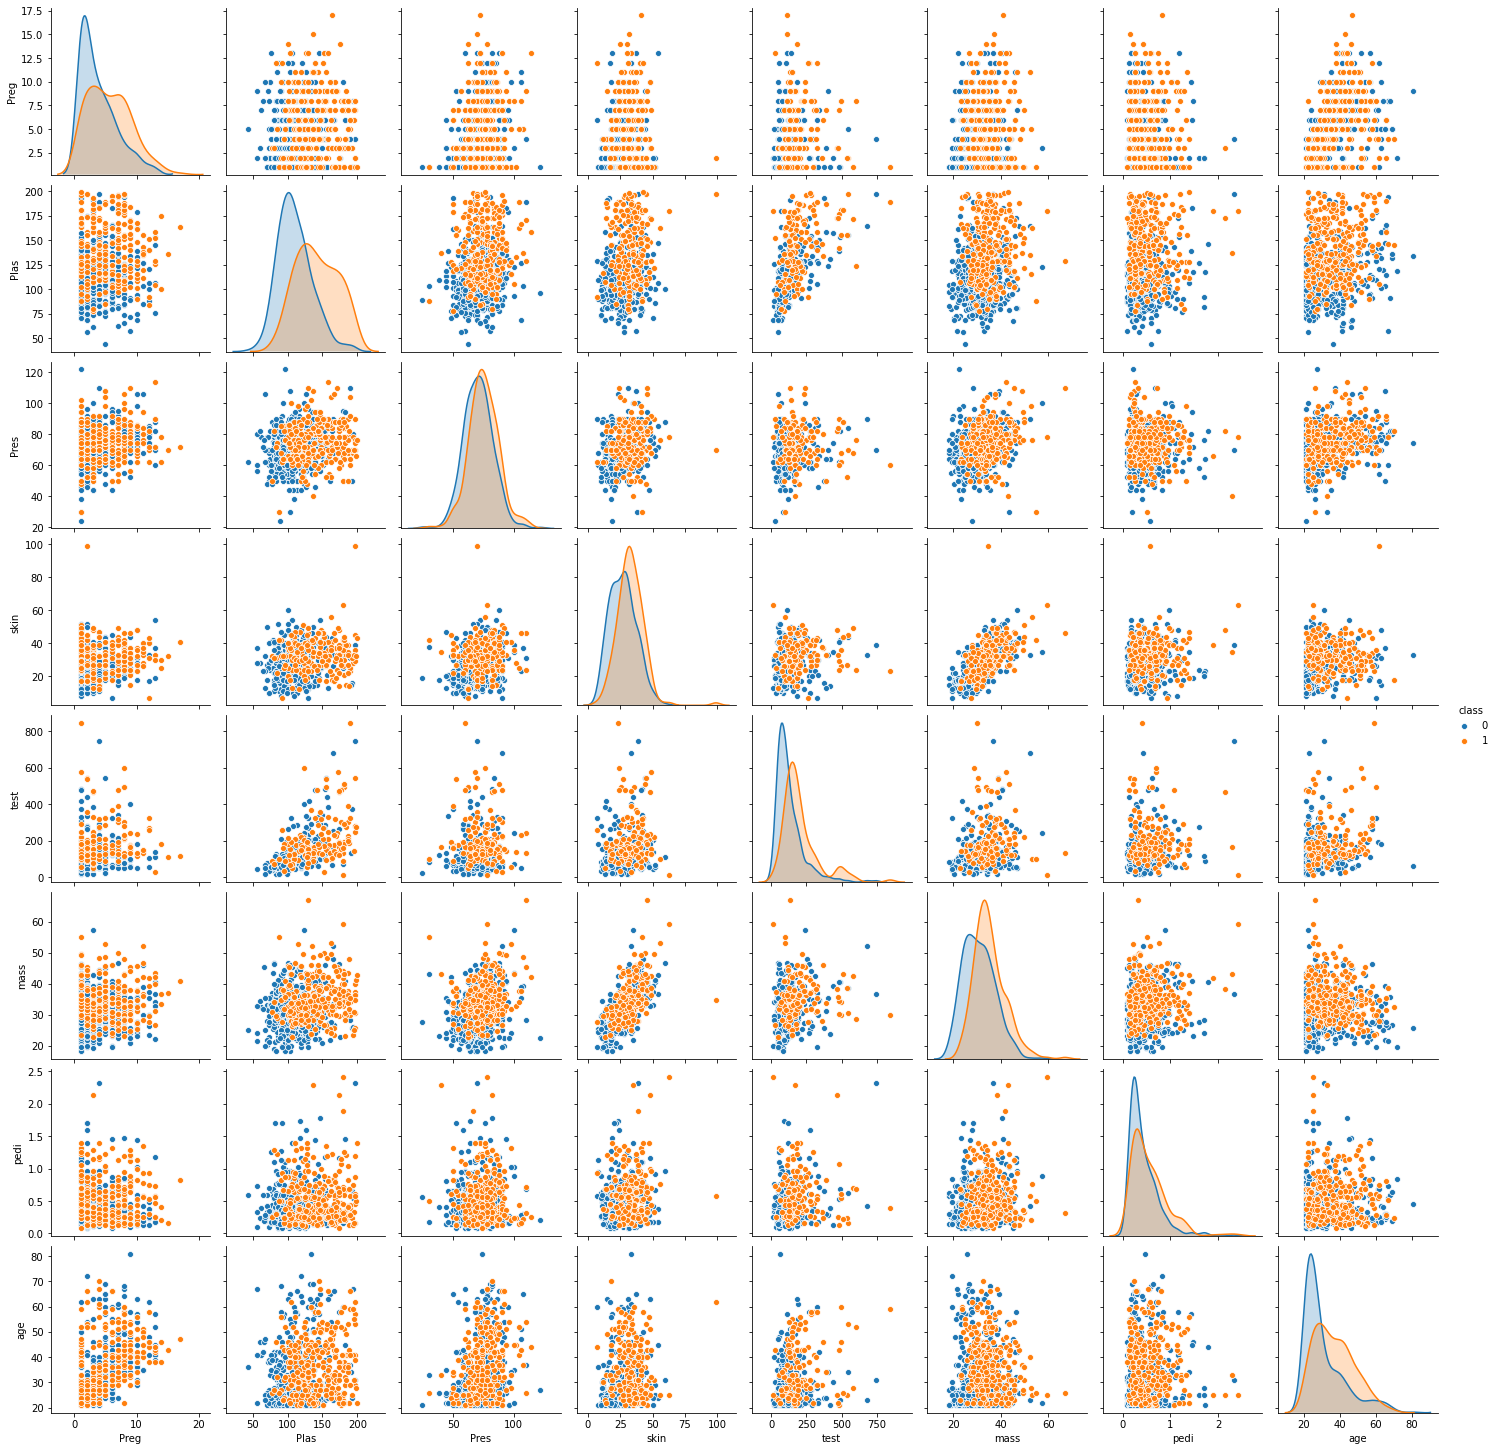

In [14]:
import seaborn as sns

sns.pairplot(df , hue='class' , diag_kind = 'kde')

In [23]:
# split dataset into inputs and outputs
values = df.values
X = values[:,0:8]
y = values[:,8]

In [25]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')  # override default behavior to replace Nan with Median
imputer.fit(X)
transformed_x = imputer.transform(X)

In [26]:
transformed_x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [27]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=test_size, random_state=seed)

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
dt_model.score(X_test , y_test)

0.7316017316017316

In [29]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[114  33]
 [ 29  55]]


# Let us regularize the tree

In [30]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [31]:
dt_model.score(X_test , y_test)

0.7445887445887446

In [32]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[113  34]
 [ 25  59]]
